In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,auc,roc_curve,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from math import sqrt
from sklearn.feature_selection import f_classif

# Load the dataset (assuming it's in a CSV file named 'Airline Passenger Satisfaction cleaned.csv')
df = pd.read_csv('mxmh_survey_results_cleaned_data.csv')

In [2]:
df.dtypes

Age                             float64
Primary streaming service         int64
Hours per day                   float64
While working                     int64
Instrumentalist                   int64
Composer                          int64
Fav genre                         int64
Exploratory                       int64
Foreign languages                 int64
BPM                             float64
Frequency [Classical]             int64
Frequency [Country]               int64
Frequency [EDM]                   int64
Frequency [Folk]                  int64
Frequency [Gospel]                int64
Frequency [Hip hop]               int64
Frequency [Jazz]                  int64
Frequency [K pop]                 int64
Frequency [Latin]                 int64
Frequency [Lofi]                  int64
Frequency [Metal]                 int64
Frequency [Pop]                   int64
Frequency [R&B]                   int64
Frequency [Rap]                   int64
Frequency [Rock]                  int64


In [3]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,0,3.0,1,1,1,8,1,1,156.0,...,3,2,3,0,2,3.0,0.0,1.0,0.0,0
1,43.0,1,1.5,1,0,0,14,1,0,119.0,...,2,2,1,3,1,7.0,2.0,2.0,1.0,0
2,18.0,0,4.0,0,0,0,15,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,43.0,2,2.5,1,0,1,6,1,1,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,0,4.0,1,0,0,12,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,0,2.0,1,1,0,14,1,1,120.0,...,3,0,1,3,0,7.0,6.0,0.0,9.0,0
732,18.0,0,1.0,1,1,0,11,1,1,160.0,...,3,0,0,2,2,3.0,2.0,2.0,5.0,0
733,19.0,4,6.0,1,0,1,13,1,0,120.0,...,2,2,2,1,1,2.0,2.0,2.0,2.0,0
734,19.0,0,5.0,1,1,0,0,0,0,170.0,...,0,0,0,0,2,2.0,3.0,2.0,1.0,0


While working, Instrumentalist, Composer, Exploratory,	Foreign languages : \
"Yes": 1, "No": 0

Fav genre：\
"Classical": 0, "Country": 1, "EDM": 2, "Folk": 3, "Gospel": 4, "Hip hop": 5, "Jazz": 6, "K pop": 7, "Latin": 8, "Lofi": 9, "Metal": 10, "Pop": 11, "R&B": 12, "Rap": 13, "Rock": 14, "Video game music": 15

Frequency [Classical] , Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music] : \
"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3 

Primary streaming service :\
"Spotify": 0, "Pandora": 1, "YouTube Music": 2, "Apple Music": 3, "Other streaming service": 4, "I do not use a streaming service.": 5

### Random Forest Model

In [ ]:
import tkinter as tk
from tkinter import messagebox
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

class RandomForestGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Random Forest Model GUI")

        # Load your dataset and preprocess it
        # Replace this with your actual dataset loading code
        # ...

        # Preprocess the dataset
        # ...

        # Convert non-numeric columns to numeric using Label Encoding
        label_encoder = LabelEncoder()
        for column in df.columns:
            if df[column].dtype == 'object':
                df[column] = label_encoder.fit_transform(df[column].astype(str))

        # Split the data into features and target variable
        X = df.drop('Music effects', axis=1)
        y = df['Music effects']

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the Random Forest model
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.model.fit(self.X_train, self.y_train)

        # Create GUI components
        self.create_gui()

    def create_gui(self):
        # Create a canvas widget and a vertical scrollbar
        canvas = tk.Canvas(self.root)
        scrollbar = tk.Scrollbar(self.root, orient="vertical", command=canvas.yview)
        # Create a frame inside the canvas and attach the scrollbar to the canvas
        scrollable_frame = tk.Frame(canvas)
        canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)
        # Bind the configure event of the canvas to a function that updates the scroll region
        canvas.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))
        # Pack the canvas and the scrollbar
        canvas.pack(side="left", fill="both", expand=True)
        scrollbar.pack(side="right", fill="y")

        # Create entry fields for each feature in the scrollable frame
        for column in self.X_train.columns:
            frame = tk.Frame(scrollable_frame)
            frame.pack(side="top", fill="x", padx=10, pady=5)

            label = tk.Label(frame, text=column)
            label.pack(side="left")

            entry = tk.Entry(frame)
            entry.pack(side="left", padx=5)
    
            # Save entry in an instance variable for later access
            setattr(self, f"{column}_entry", entry)

        # Create predict button in the scrollable frame
        self.predict_button = tk.Button(scrollable_frame, text="Predict", command=self.predict)
        self.predict_button.pack(pady=10)

        # Result label in the scrollable frame
        self.result_label = tk.Label(scrollable_frame, text="")
        self.result_label.pack()

    def predict(self):
        # Get user input from entry fields
        user_input = [float(getattr(self, f"{column}_entry").get()) for column in self.X_train.columns]

        # Make predictions using the trained model
        prediction = self.model.predict([user_input])[0]

        # Display the prediction
        self.result_label.config(text=f"The predicted music effect is: {prediction}")

if __name__ == "__main__":
    root = tk.Tk()
    app = RandomForestGUI(root)
    root.mainloop()

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction Results:\
{'Improve': 0, 'No effect': 1, 'Worsen': 2}

Best Model Accuracy for Random Forest:  0.7972972972972973
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       118
           1       0.50      0.04      0.07        26
           2       1.00      0.00      0.00         4

    accuracy                           0.80       148
   macro avg       0.77      0.34      0.32       148
weighted avg       0.75      0.80      0.72       148



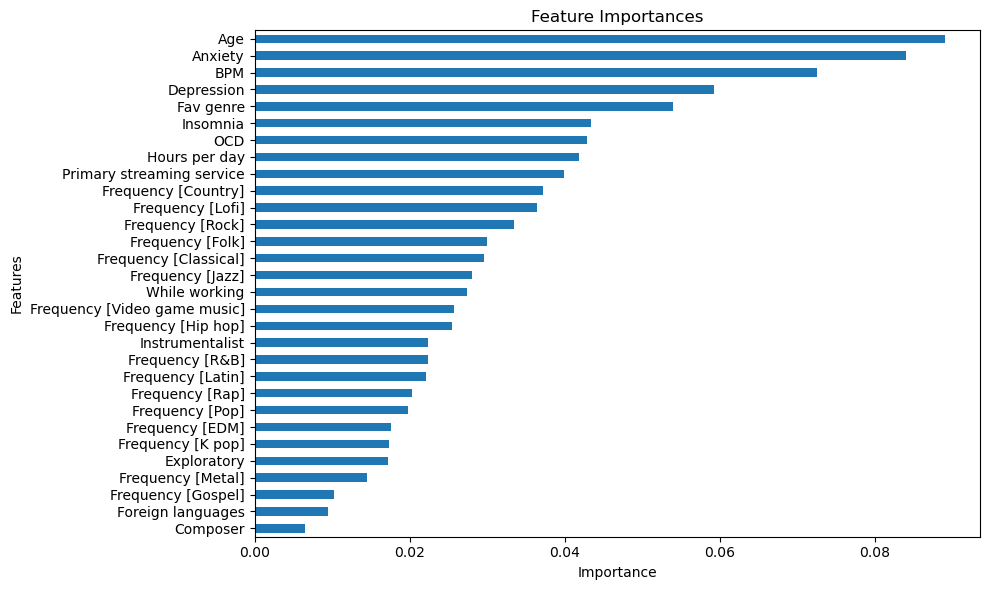

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
#label_encoder = LabelEncoder()
#categorical_columns = [
#    'Age', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages',
#    'Fav genre', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
#    'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
#    'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
#    'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
#    'Frequency [Video game music]'
#]

#for col in categorical_columns:
#    data[col] = label_encoder.fit_transform(data[col])

# Set Features and target variable
X = df.drop('Music effects', axis=1)  # Assuming 'Music effects' is your target variable
y = df['Music effects']

# Features Scaling using standardization
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Random forest model
rf = RandomForestClassifier(n_estimators=15, criterion='gini', min_samples_leaf=5, random_state=0)
# Train the model
rf.fit(X_train, y_train)

# Apply to the test set
pred_rf = rf.predict(X_test)

# Check the model accuracy
acc_rf = accuracy_score(y_test, pred_rf)
# Print the results
print(f"Best Model Accuracy for Random Forest: ", acc_rf)

# Classification report
report_rf = classification_report(y_test, pred_rf, zero_division=1)
print("Classification Report for Random Forest:\n", report_rf)

# Relationship
# Convert X back to a DataFrame
X = pd.DataFrame(X, columns=data.drop('Music effects', axis=1).columns)

# Create a DataFrame with feature names and their importance score
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plotting feature importances as a vertical bar chart
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')  # Change here to 'barh' for vertical bars
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.show()


### Extra Trees Model

In [40]:
import tkinter as tk
from tkinter import messagebox
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

class RandomForestGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Extra Trees Model GUI")

        # Load your dataset and preprocess it
        # Replace this with your actual dataset loading code
        # ...

        # Preprocess the dataset
        # ...

        # Convert non-numeric columns to numeric using Label Encoding
        label_encoder = LabelEncoder()
        for column in df.columns:
            if df[column].dtype == 'object':
                df[column] = label_encoder.fit_transform(df[column].astype(str))

        # Split the data into features and target variable
        X = df.drop('Music effects', axis=1)
        y = df['Music effects']

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the Extra Trees model
        self.model = ExtraTreesClassifier(n_estimators=100, random_state=42)
        self.model.fit(self.X_train, self.y_train)

        # Create GUI components
        self.create_gui()

    def create_gui(self):
        # Create a canvas widget and a vertical scrollbar
        canvas = tk.Canvas(self.root)
        scrollbar = tk.Scrollbar(self.root, orient="vertical", command=canvas.yview)
        # Create a frame inside the canvas and attach the scrollbar to the canvas
        scrollable_frame = tk.Frame(canvas)
        canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)
        # Bind the configure event of the canvas to a function that updates the scroll region
        canvas.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))
        # Pack the canvas and the scrollbar
        canvas.pack(side="left", fill="both", expand=True)
        scrollbar.pack(side="right", fill="y")

        # Create entry fields for each feature in the scrollable frame
        for column in self.X_train.columns:
            frame = tk.Frame(scrollable_frame)
            frame.pack(side="top", fill="x", padx=10, pady=5)

            label = tk.Label(frame, text=column)
            label.pack(side="left")

            entry = tk.Entry(frame)
            entry.pack(side="left", padx=5)
    
            # Save entry in an instance variable for later access
            setattr(self, f"{column}_entry", entry)

        # Create predict button in the scrollable frame
        self.predict_button = tk.Button(scrollable_frame, text="Predict", command=self.predict)
        self.predict_button.pack(pady=10)

        # Result label in the scrollable frame
        self.result_label = tk.Label(scrollable_frame, text="")
        self.result_label.pack()

    def predict(self):
        # Get user input from entry fields
        user_input = [float(getattr(self, f"{column}_entry").get()) for column in self.X_train.columns]

        # Make predictions using the trained model
        prediction = self.model.predict([user_input])[0]

        # Display the prediction
        self.result_label.config(text=f"The predicted music effect is: {prediction}")

if __name__ == "__main__":
    root = tk.Tk()
    app = RandomForestGUI(root)
    root.mainloop()

Prediction Results:\
{'Improve': 0, 'No effect': 1, 'Worsen': 2}

Best Model Accuracy for Random Forest:  0.8108108108108109
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       118
           1       1.00      0.08      0.14        26
           2       1.00      0.00      0.00         4

    accuracy                           0.81       148
   macro avg       0.94      0.36      0.35       148
weighted avg       0.85      0.81      0.74       148



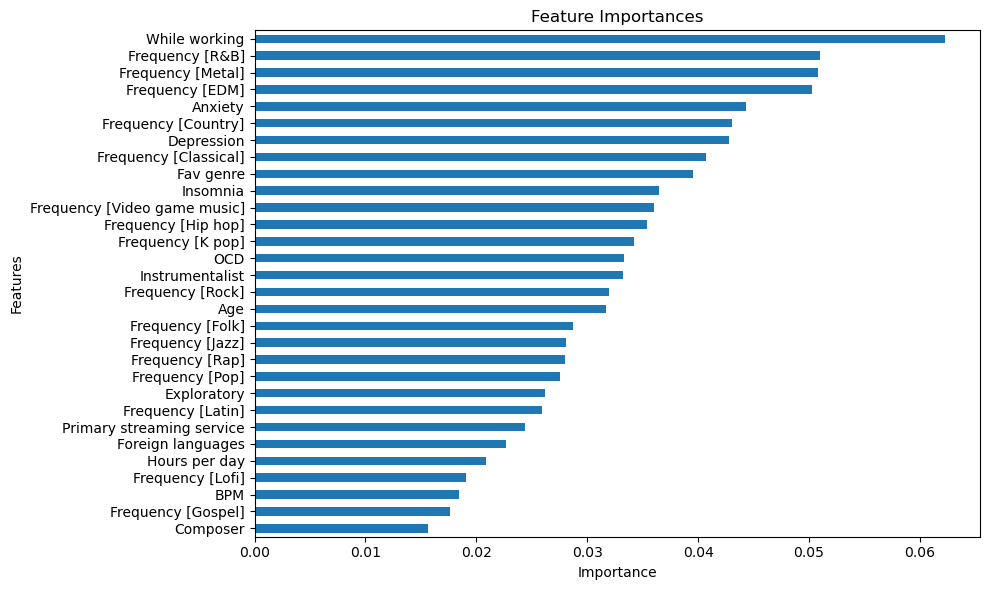

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
#label_encoder = LabelEncoder()
#categorical_columns = [
#    'Age', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages',
#    'Fav genre', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
#    'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
#    'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
#    'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
#    'Frequency [Video game music]'
#]

#for col in categorical_columns:
#    data[col] = label_encoder.fit_transform(data[col])

# Set Features and target variable
X = df.drop('Music effects', axis=1)  # Assuming 'Music effects' is your target variable
y = df['Music effects']

# Features Scaling using standardization
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Extra Tree model
et = ExtraTreesClassifier(n_estimators=15, criterion='gini', min_samples_leaf=5, random_state=0)
# Train the model
et.fit(X_train, y_train)

# Apply to the test set
pred_et = et.predict(X_test)

# Check the model accuracy
acc_et = accuracy_score(y_test, pred_et)
# Print the results
print(f"Best Model Accuracy for Random Forest: ", acc_et)

# Classification report
report_et = classification_report(y_test, pred_et, zero_division=1)
print("Classification Report for Random Forest:\n", report_et)

# Relationship
# Convert X back to a DataFrame
X = pd.DataFrame(X, columns=data.drop('Music effects', axis=1).columns)

# Create a DataFrame with feature names and their importance score
feature_importances = pd.Series(et.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plotting feature importances as a vertical bar chart
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')  # Change here to 'barh' for vertical bars
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.show()